In [5]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Добавляем категориальный признак (классы вина)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
scaler = StandardScaler()
df['alcohol_scaled'] = scaler.fit_transform(df[['alcohol']])

# Сравнение исходных и масштабированных значений
df[['alcohol', 'alcohol_scaled']].head()

,alcohol,alcohol_scaled
0,14.23,1.518613
1,13.20,0.246290
2,13.16,0.196879
3,14.37,1.691550
4,13.24,0.295700


In [8]:
onehot_encoder = OneHotEncoder(sparse_output=False)
target_onehot = onehot_encoder.fit_transform(df[['target']])
onehot_df = pd.DataFrame(target_onehot, columns=[f'target_{i}' for i in range(target_onehot.shape[1])])
df = pd.concat([df, onehot_df], axis=1)
df.filter(like='target_').head()

,target_label_encoded,target_0,target_1,target_2
0,0,1.0,0.0,0.0
1,0,1.0,0.0,0.0
2,0,1.0,0.0,0.0
3,0,1.0,0.0,0.0
4,0,1.0,0.0,0.0


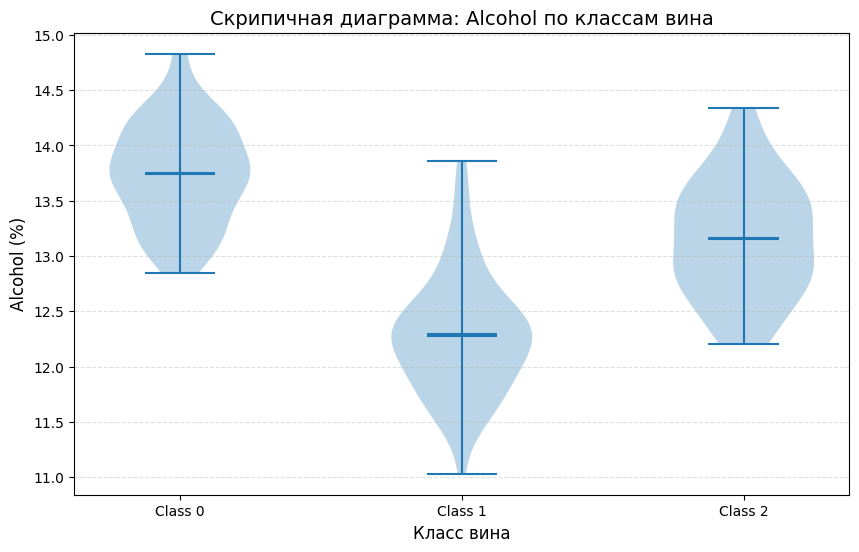

In [9]:
alcohol_by_class = [df[df['target'] == i]['alcohol'] for i in sorted(df['target'].unique())]

# Настройка графика
plt.figure(figsize=(10, 6))
plt.violinplot(alcohol_by_class, showmeans=True, showmedians=True)
plt.title('Скрипичная диаграмма: Alcohol по классам вина', fontsize=14)
plt.xlabel('Класс вина', fontsize=12)
plt.ylabel('Alcohol (%)', fontsize=12)
plt.xticks(ticks=[1, 2, 3], labels=['Class 0', 'Class 1', 'Class 2'])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()